In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models

In [14]:
# Load dataset
df = pd.read_csv("C:/Users/DELL/Nikhil451/PROJECT-1/Datasets/Heart_disease.csv")   # make sure target column is 'target'

X = df.drop('target', axis=1).values
y = df['target'].values

# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ANN Model
model_ann = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_ann.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# Evaluate
pred_ann = (model_ann.predict(X_test) > 0.5).astype(int)
print("ANN Accuracy:", accuracy_score(y_test, pred_ann))

Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.6411 - accuracy: 0.6901
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5549 - accuracy: 0.8099
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4879 - accuracy: 0.8223
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4343 - accuracy: 0.8347
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3905 - accuracy: 0.8719
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3638 - accuracy: 0.8595
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3443 - accuracy: 0.8719
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8678
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3162 - accuracy: 0.8843
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.8884
Epoch 11/50
16/16 [

In [15]:
print("ANN Accuracy:", accuracy_score(y_test, pred_ann))

ANN Accuracy: 0.8360655737704918


In [16]:
# CNN
df = pd.read_csv("C:/Users/DELL/Nikhil451/PROJECT-1/Datasets/Heart_disease.csv")
X = df.drop("target", axis=1).values
y = df["target"].values

# scale
scaler = StandardScaler()
X = scaler.fit_transform(X)

# reshape for 1D CNN (samples, timesteps, channels)
X = X.reshape(X.shape[0], X.shape[1], 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 1D CNN model
model_cnn = models.Sequential([
    layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_cnn.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# Evaluate
pred_cnn = (model_cnn.predict(X_test) > 0.5).astype(int)
print("CNN Accuracy:", accuracy_score(y_test, pred_cnn))

Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.6459 - accuracy: 0.6736
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5459 - accuracy: 0.7893
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4800 - accuracy: 0.7975
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4637 - accuracy: 0.7851
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4391 - accuracy: 0.7975
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4367 - accuracy: 0.7975
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4233 - accuracy: 0.7934
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4160 - accuracy: 0.7934
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4141 - accuracy: 0.8017
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4211 - accuracy: 0.7893
Epoch 11/50
16/16 [

In [17]:
print("CNN Accuracy:", accuracy_score(y_test, pred_cnn))

CNN Accuracy: 0.8852459016393442


In [18]:
#RNN

df = pd.read_csv("C:/Users/DELL/Nikhil451/PROJECT-1/Datasets/Heart_disease.csv")
X = df.drop("target", axis=1).values
y = df["target"].values

# scale
scaler = StandardScaler()
X = scaler.fit_transform(X)

# reshape for LSTM (samples, timesteps, features_per_step)
# each feature considered a time-step
X = X.reshape(X.shape[0], X.shape[1], 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# LSTM model
model_rnn = models.Sequential([
    layers.LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=False),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_rnn.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# Evaluate
pred_rnn = (model_rnn.predict(X_test) > 0.5).astype(int)
print("RNN (LSTM) Accuracy:", accuracy_score(y_test, pred_rnn))


Epoch 1/50
16/16 [==============================] - 4s 6ms/step - loss: 0.6730 - accuracy: 0.6322
Epoch 2/50
16/16 [==============================] - 0s 7ms/step - loss: 0.6467 - accuracy: 0.6322
Epoch 3/50
16/16 [==============================] - 0s 8ms/step - loss: 0.6301 - accuracy: 0.6694
Epoch 4/50
16/16 [==============================] - 0s 7ms/step - loss: 0.6118 - accuracy: 0.6942
Epoch 5/50
16/16 [==============================] - 0s 8ms/step - loss: 0.5951 - accuracy: 0.6942
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 0.5797 - accuracy: 0.7149
Epoch 7/50
16/16 [==============================] - 0s 7ms/step - loss: 0.5693 - accuracy: 0.7231
Epoch 8/50
16/16 [==============================] - 0s 7ms/step - loss: 0.5608 - accuracy: 0.7479
Epoch 9/50
16/16 [==============================] - 0s 11ms/step - loss: 0.5495 - accuracy: 0.7521
Epoch 10/50
16/16 [==============================] - 0s 7ms/step - loss: 0.5349 - accuracy: 0.7397
Epoch 11/50
16/16 

In [19]:
print("RNN (LSTM) Accuracy:", accuracy_score(y_test, pred_rnn))

RNN (LSTM) Accuracy: 0.7704918032786885


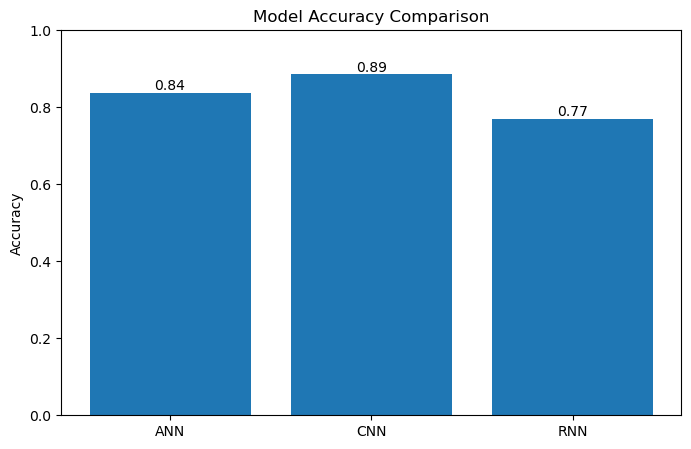

In [24]:
import matplotlib.pyplot as plt

# Example accuracies (replace with your actual results)
models = ["ANN", "CNN", "RNN"]
accuracies = [accuracy_score(y_test, pred_ann), accuracy_score(y_test, pred_cnn), accuracy_score(y_test, pred_rnn)]

plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracies)

# Add accuracy labels above bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height(), 
             f"{acc:.2f}", 
             ha='center', 
             va='bottom')

plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.savefig("DL_model_with_outliers.png")
plt.show()

In [21]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
def evaluate_model(y_test, y_pred, model_name):
    print(f"\nPerformance Report for {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("AUC-ROC Score:", roc_auc_score(y_test, y_pred))

In [22]:
evaluate_model(y_test,pred_ann,"ANN")
evaluate_model(y_test,pred_cnn,"CNN")
evaluate_model(y_test,pred_rnn,"RNN")


Performance Report for ANN
Accuracy: 0.8360655737704918
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

AUC-ROC Score: 0.8389008620689655

Performance Report for CNN
Accuracy: 0.8852459016393442
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

AUC-ROC Score: 0.8873922413793103

Performance Report for RNN
Accuracy: 0.7704918032786885
Classification Report:
               precision    recall  